In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Data Import and calculation of key metrics

In [41]:
tickers,start,end = ['HDFCBANK.NS','TCS.NS','RELIANCE.NS'],'2020-01-01','2023-06-01'

data = yf.download(tickers,start=start,end=end,interval='1mo')['Close'] #yf adjusts close by default
returns = data.pct_change().dropna()

returns

[*********************100%***********************]  3 of 3 completed


Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Date,,,
2020-02-01,-0.039672,-0.058797,-0.035765
2020-03-01,-0.268119,-0.161743,-0.087019
2020-04-01,0.162316,0.316274,0.111203
2020-05-01,-0.050060,0.008377,-0.020899
2020-06-01,0.120002,0.163685,0.055670
2020-07-01,-0.031008,0.213016,0.098915
2020-08-01,0.080413,0.006579,-0.008366
2020-09-01,-0.033383,0.073845,0.104131
2020-10-01,0.097302,-0.080493,0.069233


In [42]:
return_risk = pd.concat((returns.mean(axis=0),returns.std()),axis=1)#Expected Return and std.
return_risk.columns = ['mean_return','std.']
return_risk

,mean_return,std.
Ticker,,
HDFCBANK.NS,0.010354,0.078865
RELIANCE.NS,0.018272,0.090918
TCS.NS,0.014655,0.064286


In [43]:
cov_matrix = returns.cov()
cov_matrix

Ticker,HDFCBANK.NS,RELIANCE.NS,TCS.NS
Ticker,,,
HDFCBANK.NS,0.006220,0.003464,0.001934
RELIANCE.NS,0.003464,0.008266,0.002507
TCS.NS,0.001934,0.002507,0.004133


Five Portfolios

In [44]:
r = 0.005 #monthly risk-free rate of 0.5%

In [45]:
#Generating 5 random arrays of size 3 and normalising each row
weights = np.random.random((5,3))
weights /= weights.sum(axis=1)[:,np.newaxis] 
display(weights)
display(weights.sum(axis=1))

array([[0.59832984, 0.2501214 , 0.15154876],
       [0.06291854, 0.43884179, 0.49823967],
       [0.40343477, 0.18266733, 0.4138979 ],
       [0.30290991, 0.3902682 , 0.30682189],
       [0.39529595, 0.33687234, 0.26783171]])

array([1., 1., 1., 1., 1.])

The expected returns array for various portfolios is simply $W \mu \in \mathbb{R}^5$

$\mu \in \mathbb{R}^3$ being the expected returns array for the 3 stocks

In order to calculate variance for each portfolio i.e row $w_i$ of the matrix $W$, given $\Sigma$ is the 3x3 covariance matrix we compute 

$Var(R_i)=w_i^T \Sigma w_i \in \mathbb{R}$  

for each $i=1,2...5$

Note: We call this a quadratic form.

With the logic of Matrix multplication we can use

$Var(R) = diag(W \Sigma W^T) \in \mathbb{R}^5$

In [46]:
portfolio_returns = weights@return_risk['mean_return'].values
portfolio_std = np.sqrt(np.diag(weights@cov_matrix.values@weights.T))
display(portfolio_returns)
display(portfolio_std)

array([0.01298637, 0.01597173, 0.01358056, 0.01476387, 0.01417338])

array([0.06645489, 0.06365103, 0.0594283 , 0.06322714, 0.06317347])

In [47]:
sharpe = ((portfolio_returns-r)/portfolio_std)*12**0.5 #annualising based on monthly returns data
sharpe

array([0.41630628, 0.5971183 , 0.50016474, 0.53494497, 0.50302024])

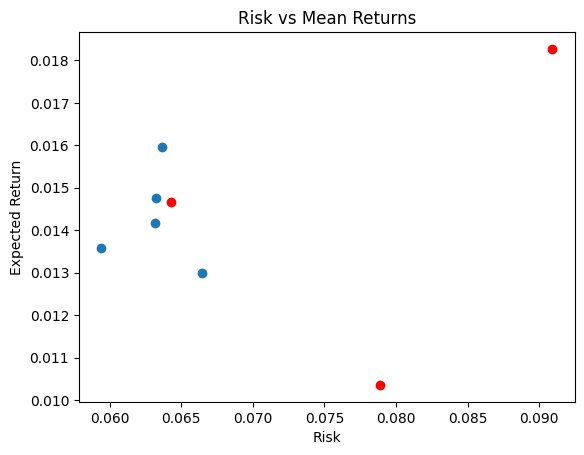

In [48]:
plt.scatter(portfolio_std,portfolio_returns)
plt.scatter(return_risk['std.'].values,return_risk['mean_return'].values,c='red')
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Risk vs Mean Returns')
plt.show()

Tangency Weights: [0.06291854 0.43884179 0.49823967]
Min Variance Weights: [0.40343477 0.18266733 0.4138979 ]


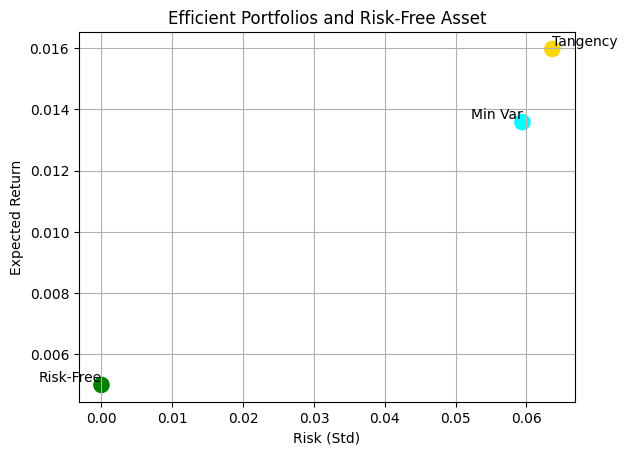

In [49]:
tangency = np.argmax(sharpe)
min_variance = np.argmin(portfolio_std)

print("Tangency Weights:", weights[tangency])
print("Min Variance Weights:", weights[min_variance])

x = [0, portfolio_std[min_variance], portfolio_std[tangency]]
y = [r, portfolio_returns[min_variance], portfolio_returns[tangency]]

plt.scatter(x, y, c=['green', 'cyan', 'gold'], marker='o', s=120)
plt.text(0, r, 'Risk-Free', ha='right', va='bottom')
plt.text(x[1], y[1], 'Min Var', ha='right', va='bottom')
plt.text(x[2], y[2], 'Tangency', ha='left', va='bottom')
plt.xlabel('Risk (Std)')
plt.ylabel('Expected Return')
plt.title('Efficient Portfolios and Risk-Free Asset')
plt.grid(True)
plt.show()